# A look at model comparison
see : https://docs.pymc.io/notebooks/Bayes_factor.html

https://docs.pymc.io/notebooks/model_comparison.html

In [1]:
from collections import OrderedDict
import numpy as np
import pymc3 as pm
import seaborn as sns
sns.set(font_scale=1.5)
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = scipy.stats.nbinom.rvs(50, 0.04, size=20)

In [3]:
with pm.Model() as modelp:
    # fit a poisson and negbin
    p_mean = pm.Uniform('p_mean', 1, 10000)
    p = pm.Poisson('p', mu=p_mean, observed=data)
    tracep = pm.sample(10000, tune=4000)

with pm.Model() as modelnb:
    # fit a poisson and negbin
    nb_mean = pm.Uniform('nb_mean', 1, 10000)
    nb_alpha = pm.Uniform('nb_alpha', 1, 1000)
    nb = pm.NegativeBinomial('nb', mu=nb_mean, alpha=nb_alpha, observed=data)
    tracenb = pm.sample(10000, tune=4000)
    
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_mean_interval__]
 94%|█████████▎| 13122/14000 [00:07<00:00, 1743.78it/s]INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '68049' (I am process '68051')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
100%|██████████| 14000/14000 [00:07<00:00, 1753.51it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '68050' (I am process '68051')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/balarsen/.theano/compiledir_Darwin-15.6.0-x86_64-i386-64bit-i386-3.6.5-64/lock_dir
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1139c4710>,
      dtype=object)

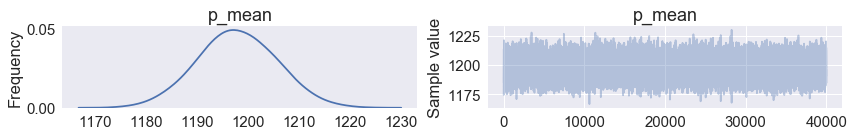

In [4]:
pm.traceplot(tracep, combined=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113951550>,
      dtype=object)

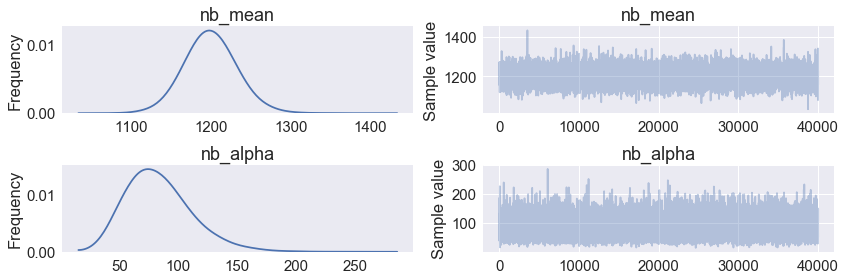

In [5]:
pm.traceplot(tracenb, combined=True)

In [6]:
ppcp = pm.sample_ppc(tracep, samples=1000, model=modelp)
ppcnb = pm.sample_ppc(tracenb, samples=1000, model=modelnb)


100%|██████████| 1000/1000 [00:00<00:00, 2602.80it/s]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


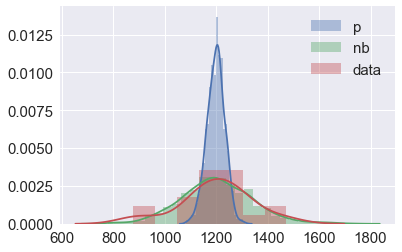

In [7]:
sns.distplot(ppcp['p'], label='p')
sns.distplot(ppcnb['nb'], label='nb')
sns.distplot(data, label='data')
plt.legend()

In [8]:
pm.stats.waic(tracep, model=modelp, progressbar=True)

40000it [00:02, 17237.35it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=515.6142668944889, WAIC_se=121.9980968996465, p_WAIC=15.80075552087816, var_warn=1)

In [9]:
pm.stats.waic(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11783.87it/s]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


WAIC_r(WAIC=259.3168453360865, WAIC_se=8.905420166908879, p_WAIC=2.6053888624910377, var_warn=1)

In [10]:
pm.stats.loo(tracep, model=modelp, progressbar=True)

40000it [00:02, 15825.68it/s]


LOO_r(LOO=515.226755026895, LOO_se=121.7998031279986, p_LOO=15.60699958708122, shape_warn=0)

In [11]:
pm.stats.loo(tracenb, model=modelnb, progressbar=True)

40000it [00:03, 11618.43it/s]


LOO_r(LOO=259.5775131747227, LOO_se=9.063416689900073, p_LOO=2.7357227818091587, shape_warn=0)

In [13]:
tracep.name = 'Poisson'
tracenb.name = 'NegBin'

mods = OrderedDict()
mods[modelp]= tracep
mods[modelnb]= tracenb

comp = pm.stats.compare(mods)
comp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pymc3/stats.py:211: UserWarning: For one or more samples the posterior variance of the
        log predictive densities exceeds 0.4. This could be indication of
        WAIC starting to fail see http://arxiv.org/abs/1507.04544 for details
        
  """)


,WAIC,pWAIC,dWAIC,weight,SE,dSE,var_warn
1,259.32,2.61,0,0.88,8.91,0,1
0,515.61,15.8,256.3,0.12,122,113.11,1


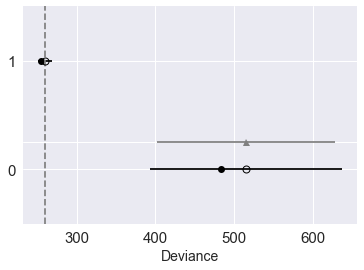

In [14]:
pm.plots.compareplot(comp)